In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [3]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for sentence,label in train_data:
  training_sentences.append(str(sentence.numpy()))
  training_labels.append(label.numpy())

for sentence, label in test_data:
  testing_sentences.append(str(sentence.numpy()))
  testing_labels.append(label.numpy())

# Example of positive review
print(len(training_sentences)) 
print(training_sentences[0])
print(len(training_labels))
print(training_labels[0])   

25000
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
25000
0


In [4]:
# Example of negative review
print(training_sentences[5])
print(training_labels[5])

b"This is a film which should be seen by anybody interested in, effected by, or suffering from an eating disorder. It is an amazingly accurate and sensitive portrayal of bulimia in a teenage girl, its causes and its symptoms. The girl is played by one of the most brilliant young actresses working in cinema today, Alison Lohman, who was later so spectacular in 'Where the Truth Lies'. I would recommend that this film be shown in all schools, as you will never see a better on this subject. Alison Lohman is absolutely outstanding, and one marvels at her ability to convey the anguish of a girl suffering from this compulsive disorder. If barometers tell us the air pressure, Alison Lohman tells us the emotional pressure with the same degree of accuracy. Her emotional range is so precise, each scene could be measured microscopically for its gradations of trauma, on a scale of rising hysteria and desperation which reaches unbearable intensity. Mare Winningham is the perfect choice to play her m

In [5]:
# converting training and testing labels into Numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)
print(training_labels_final.shape)
print(testing_labels_final.shape)

(25000,)
(25000,)


In [6]:
# Parameter definition
vocab_size = 10000
embedding_dim = 32
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
# tokenize the training sentences
tokenizer.fit_on_texts(training_sentences)
# create the dictionary word index
word_index = tokenizer.word_index
# convert the sentences into list of tokens
sequences = tokenizer.texts_to_sequences(training_sentences)
# pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [8]:
# print out the above conversions
print('Number of words : {}'.format(len(word_index)))
print('Length of sequences list : {}'.format(len(sequences)))
print('Length of padded sequences : {}'.format(len(padded_sequences)))
print('Token for word movie : {}'.format(word_index['movie']))
print('First text in sequence : {}'.format(sequences[0]))
print('First padded sequence : {}'.format(padded_sequences[0]))

Number of words : 86539
Length of sequences list : 25000
Length of padded sequences : 25000
Token for word movie : 18
First text in sequence : [59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 7986, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 7232, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10]
First padded sequence : [   0    0   59   12   14   35  439  400   18  174   29    1    9   33
 1378 3401   42  496    1  197   25   88  156   19   12  211  340   29
   70  248  213    9  486   62   70   88  116   99   24 5740   12 3317
  657  777   12   18    7   35  406 8228  178 2477  426    2   92 1253
  140   72  149   5

In [9]:
# Convert the testing sentences to sequences as well
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# padd the sequences as well
padded_testing_sequences = pad_sequences(testing_sequences, maxlen = max_length, truncating=trunc_type)

In [10]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [11]:
# from dictionary get the string
def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [12]:
# first training sentence and sentence after padding
print('Original text : ' + training_sentences[1])
print('Padded text : ' + decode_review(padded_sequences[1]))

Original text : b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.'
Padded text : ? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to

In [13]:
# create the model
model = tf.keras.Sequential()
# add an Embedding layer
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
# add a bidirectional LSTM layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
# dense layer
model.add(tf.keras.layers.Dense(6, activation='relu'))
# add output sigmoid layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
# compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 337,037
Trainable params: 337,037
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fit the model
history = model.fit(padded_sequences, training_labels_final, epochs=10, validation_data=(padded_testing_sequences, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 48s 61ms/step - loss: 0.6095 - accuracy: 0.6591 - val_loss: 0.5685 - val_accuracy: 0.6826
Epoch 2/10
782/782 [==============================] - 47s 60ms/step - loss: 0.6050 - accuracy: 0.6599 - val_loss: 0.6138 - val_accuracy: 0.6685
Epoch 3/10
782/782 [==============================] - 47s 60ms/step - loss: 0.6083 - accuracy: 0.6818 - val_loss: 0.6378 - val_accuracy: 0.6556
Epoch 4/10
782/782 [==============================] - 47s 60ms/step - loss: 0.5872 - accuracy: 0.6957 - val_loss: 0.5680 - val_accuracy: 0.7131
Epoch 5/10
782/782 [==============================] - 47s 60ms/step - loss: 0.4623 - accuracy: 0.7877 - val_loss: 0.4785 - val_accuracy: 0.7831
Epoch 6/10
782/782 [==============================] - 47s 60ms/step - loss: 0.3363 - accuracy: 0.8604 - val_loss: 0.4448 - val_accuracy: 0.8076
Epoch 7/10
782/782 [==============================] - 47s 60ms/step - loss: 0.2715 - accuracy: 0.8908 - val_loss: 0.4341 - val_accuracy:

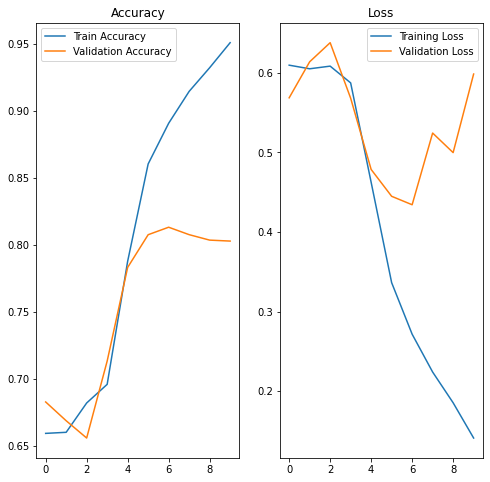

In [19]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()